In [1]:
from networkx import maximum_flow, gnm_random_graph, draw, \
            adjacency_matrix, all_simple_paths
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [65]:
min_weight, max_weight = 0, 10
n_nodes, n_edges = 7, 14
source, destination = 0, 1 # don't need to randomize (graph is randomized)

In [66]:
Graph = gnm_random_graph(n_nodes, n_edges)

for (u, v) in Graph.edges():
    Graph.edges[u,v]['weight'] = random.randint(min_weight, max_weight)

Adj_matrix = adjacency_matrix(Graph)
print (Adj_matrix.todense())

[[ 0  0  5 10  9  5  0]
 [ 0  0  0  0  7  6  2]
 [ 5  0  0  8  6  7  0]
 [10  0  8  0  0  0  4]
 [ 9  7  6  0  0  0  5]
 [ 5  6  7  0  0  0  5]
 [ 0  2  0  4  5  5  0]]


C:\Users\val\AppData\Local\Temp\ipykernel_7752\2735271450.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Adj_matrix = adjacency_matrix(Graph)


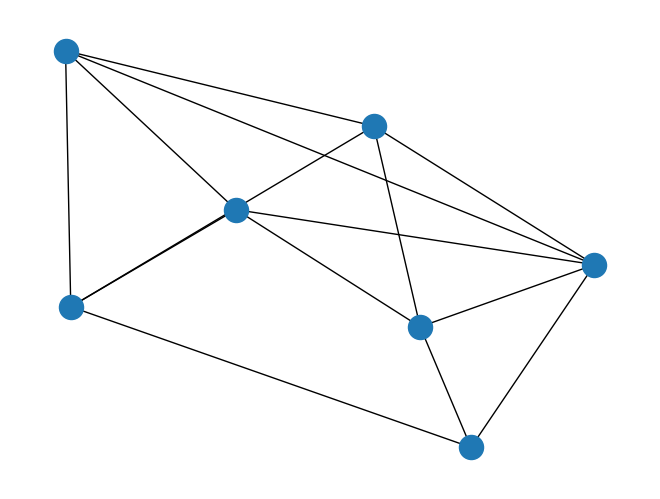

In [67]:
draw(Graph)

In [68]:
flow, flow_dict = maximum_flow(Graph, _s = source, _t = destination, capacity='weight')
print (flow) # total flow
print (flow_dict[0])

15
{5: 5, 2: 4, 3: 2, 4: 4}


maximum flow is equivalent to maximum path generation

In [172]:
import xpress as xp

In [161]:
# lots of paths : don't print it !!!
def get_paths (Graph, source, destination) :
    return list(all_simple_paths(Graph, source, destination))
def get_variables (Graph, source, destination) :
    return np.array([xp.var(str(path)) for path in get_paths(Graph, source, destination)])

In [177]:
Xp = get_variables(Graph, source, destination)
print(len(Xp))
Xp[0]

46


[0, 5, 1]

In [176]:
problem_ = xp.problem(sense=xp.maximize)

problem_.addVariable(Xp)
# problem.addConstraint() ...
problem_.setObjective(np.sum(Xp))
problem_.solve()


FICO Xpress v8.14.4, Community, solve started 16:13:57, Nov 29, 2022
Heap usage: 384KB (peak 384KB, 453KB system)
Minimizing LP noname using up to 8 threads and up to 31GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         0 rows           46 cols            0 elements
Presolved problem has:
         0 rows           46 cols            0 elements
Presolve finished in 0 seconds
Heap usage: 387KB (peak 397KB, 453KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  RHS and bounds [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0           .000000      D      0     0        .000000     0
Uncrunching matrix
Optimal solution found
Dual solved problem
